In [3]:
import pandas as pd
import numpy as np
from keplergl import KeplerGl
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Admin\Desktopworkfolder\term 2\Machine learning\CA1\kc_house_data\kc_house_data.csv')
# https://www.youtube.com/watch?v=H8kocPOT5v0
# https://github.com/aidanandrucyk/KingCountyHouseSalePriceMLAnalysis/blob/master/ML_King_County_Housing_Price_Predictor.ipynb
# https://github.com/threnjen/king_county_housing?tab=readme-ov-file
# https://github.com/nadinezab/kc-house-prices-prediction/blob/master/kc-house-prices.ipynb

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
map_1 = KeplerGl(height=500)
map_1.add_data(data=df, name="King County")
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'King County': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

In [7]:
# the map shows that there are some houses are found far away from the inner city areas. 

3123089010
3123089027
9413400165
4032500035
192300020

226109056
7349800780

774100475
774101755
774100355

2626119028
2626119062
5061300030
7805600070
5062300280

8649400790
8649400410
8649401000
8649401270
1437500015
1437500035

1437500035

In [8]:
# total of 21 houses are not within the inner cities, and I remove them from the dataset

In [9]:
# df.columns = df.columns.str.strip()

In [13]:
ids_to_remove = [
    '3123089010', '3123089027', '9413400165', 
    '4032500035','192300020','226109056', 
    '7349800780', '774100475', '774101755', 
    '774100355', '2626119028', '2626119062', 
    '5061300030', '7805600070', '5062300280',
    '8649400790', '8649400410', '8649401000', 
    '8649401270','1437500015', '1437500035']

df['id'] = df['id'].astype(str)
df_filtered = df[~df['id'].isin(ids_to_remove)]

In [15]:
print("Original size:", len(df))
print("Filtered size:", len(df_filtered))
print("Rows removed:", len(df) - len(df_filtered))

Original size: 21613
Filtered size: 21592
Rows removed: 21


In [17]:
df_filtered

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [14]:
df_filtered['date'] = df_filtered['date'].str.replace('T000000', '', regex=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10104\3997594376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].str.replace('T000000', '', regex=False)


In [22]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y%m%d')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10104\1455118406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y%m%d')


In [24]:
df_filtered

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [26]:
df_filtered.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

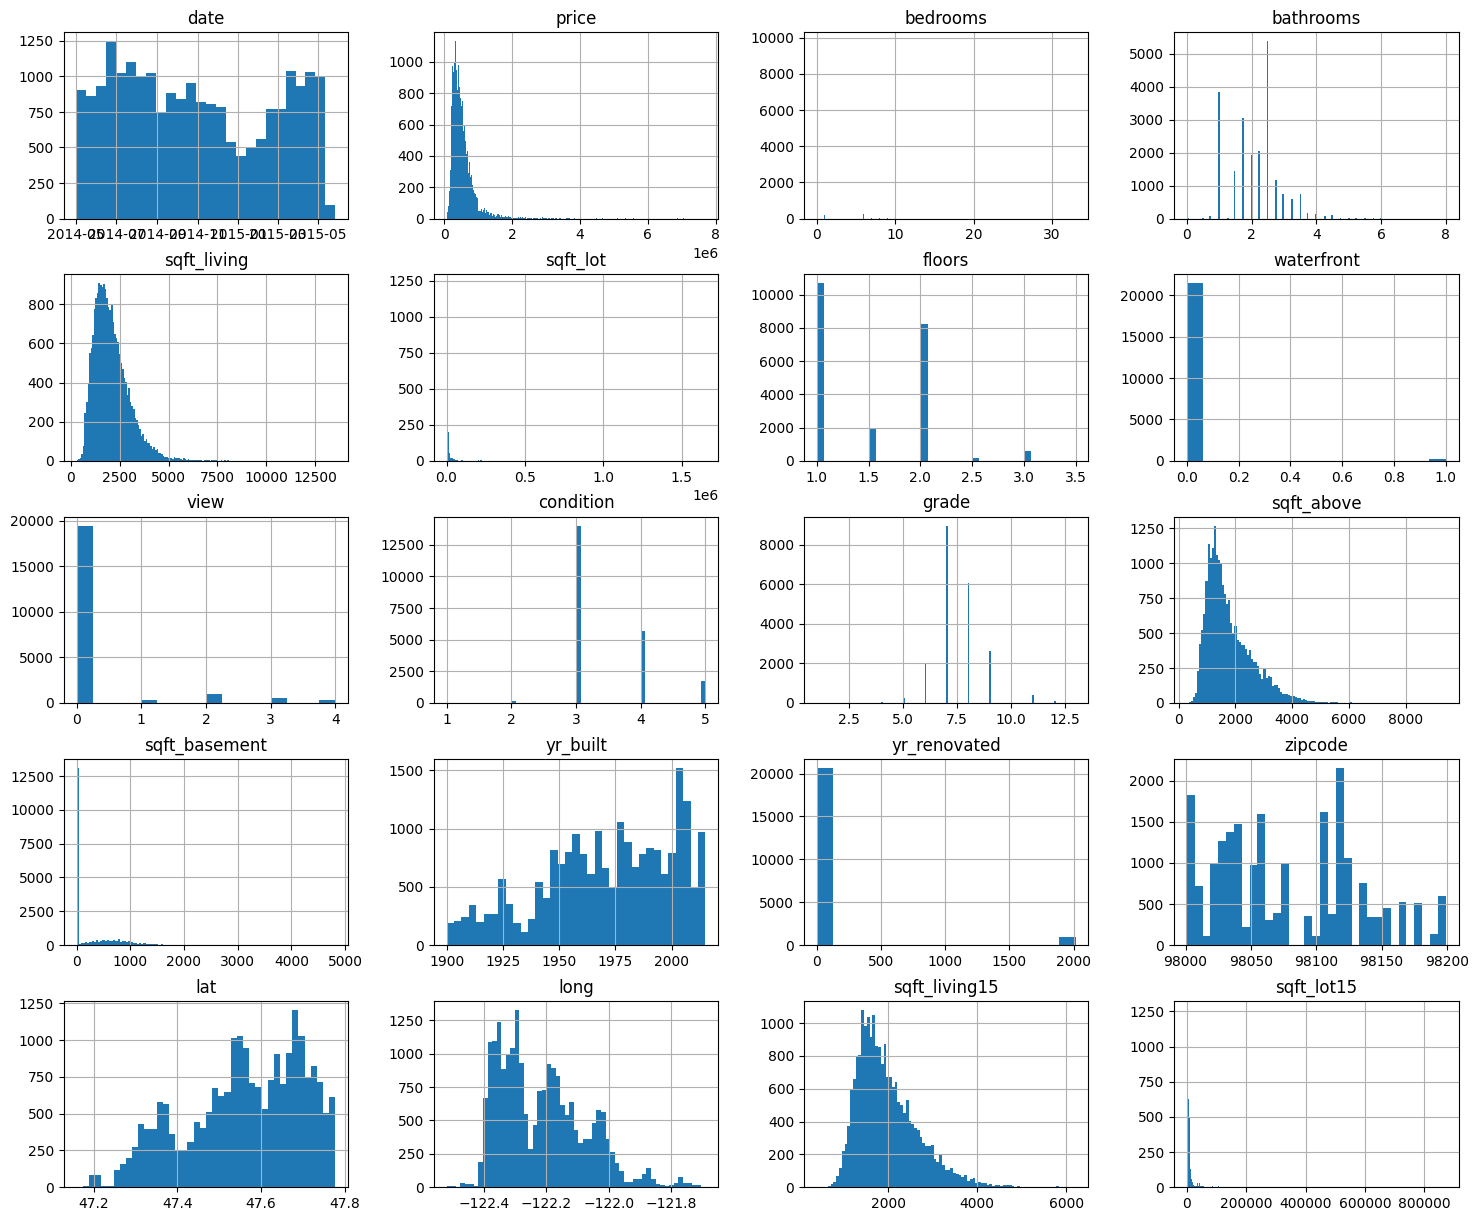

In [28]:
df_filtered.hist(figsize=(18,15), bins='auto')

In [29]:
# Total number of years the house has been around.
df_filtered['hse_years_total'] = 2015 - df['yr_built'] 

# Whether there was renovation done 
df_filtered['renovation_status'] = (df_filtered['yr_renovated'] != 0).astype(int)

# Size of the basement, if basement = 0 can assume that basement doesnt exist
df_filtered['basement_presence'] = (df_filtered['sqft_basement'] != 0).astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10104\3608595761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hse_years_total'] = 2015 - df['yr_built']
C:\Users\Admin\AppData\Local\Temp\ipykernel_10104\3608595761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['renovation_status'] = (df_filtered['yr_renovated'] != 0).astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10104\3608595761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [47]:
df_corr = df_filtered.drop(['id', 'lat', 'long', 'date','zipcode'], axis = 1)

In [49]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21592 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21592 non-null  float64
 1   bedrooms           21592 non-null  int64  
 2   bathrooms          21592 non-null  float64
 3   sqft_living        21592 non-null  int64  
 4   sqft_lot           21592 non-null  int64  
 5   floors             21592 non-null  float64
 6   waterfront         21592 non-null  int64  
 7   view               21592 non-null  int64  
 8   condition          21592 non-null  int64  
 9   grade              21592 non-null  int64  
 10  sqft_above         21592 non-null  int64  
 11  sqft_basement      21592 non-null  int64  
 12  yr_built           21592 non-null  int64  
 13  yr_renovated       21592 non-null  int64  
 14  sqft_living15      21592 non-null  int64  
 15  sqft_lot15         21592 non-null  int64  
 16  hse_years_total    21592 no

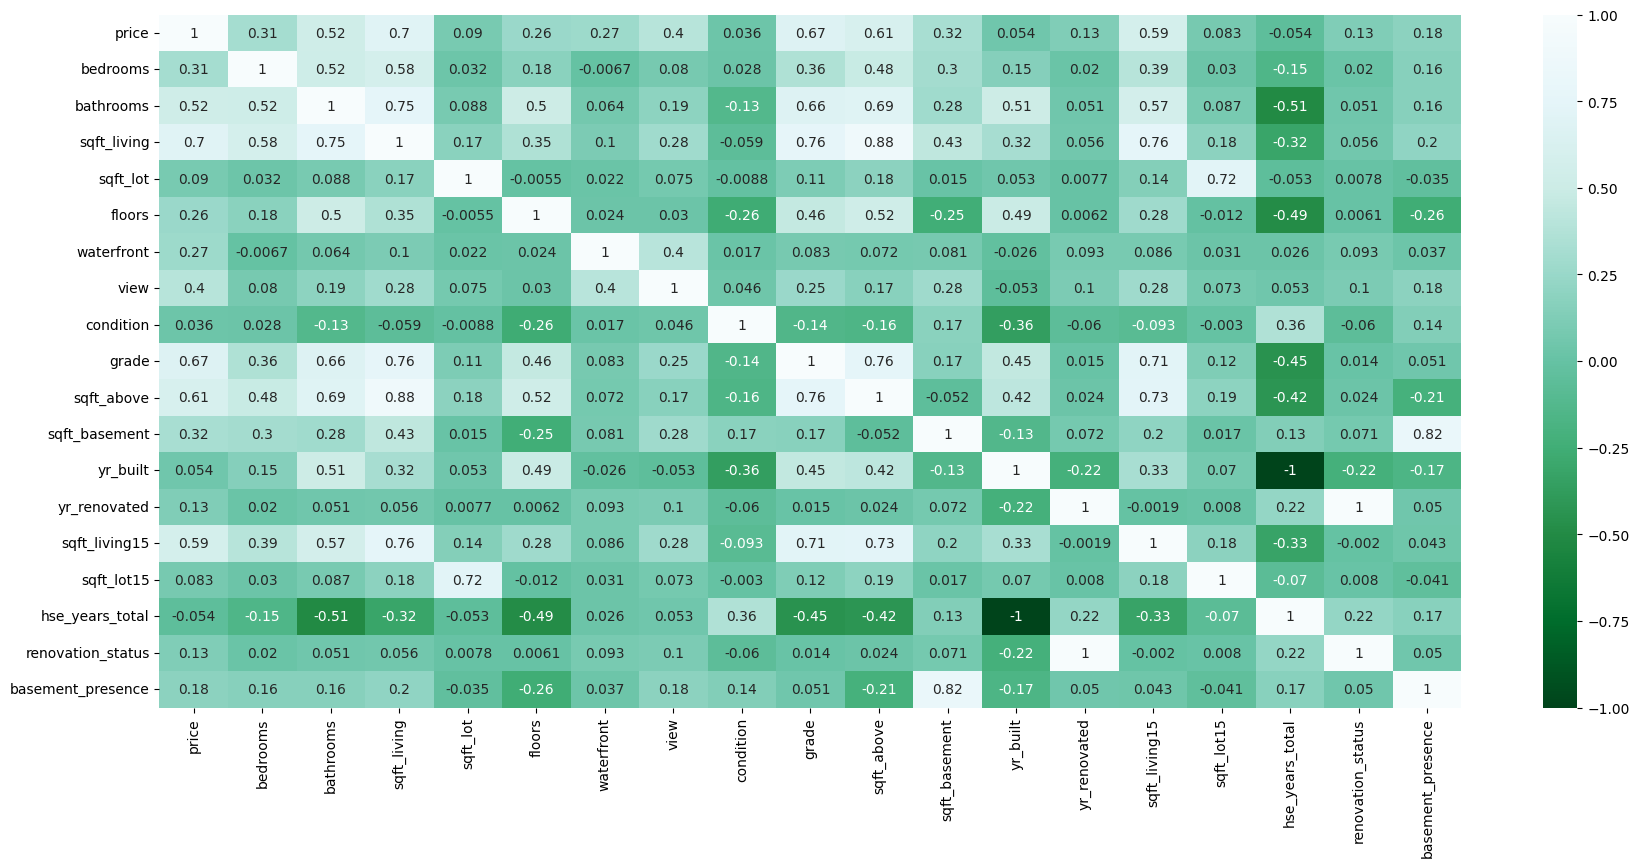

In [65]:
plt.figure(figsize=(21, 9)) 
sns.heatmap(df_corr.corr(), annot=True, cmap='BuGn_r') 
plt.show()

In [75]:
# Correlation of all features with 'price'
corr_with_price = df_corr.corr()['price'].sort_values(ascending=False)

# Top positive correlations (excluding price itself)
top_positive = corr_with_price[1:6]  # top 5
print("Top Positive Correlations with Price:\n", top_positive)

# Top negative correlations
top_negative = corr_with_price.tail(5)  # bottom 5
print("\nTop Negative Correlations with Price:\n", top_negative)

Top Positive Correlations with Price:
 sqft_living      0.701964
grade            0.667395
sqft_above       0.605513
sqft_living15    0.585074
bathrooms        0.524872
Name: price, dtype: float64

Top Negative Correlations with Price:
 sqft_lot           0.089837
sqft_lot15         0.082709
yr_built           0.053886
condition          0.036287
hse_years_total   -0.053886
Name: price, dtype: float64


<Axes: xlabel='long', ylabel='lat'>

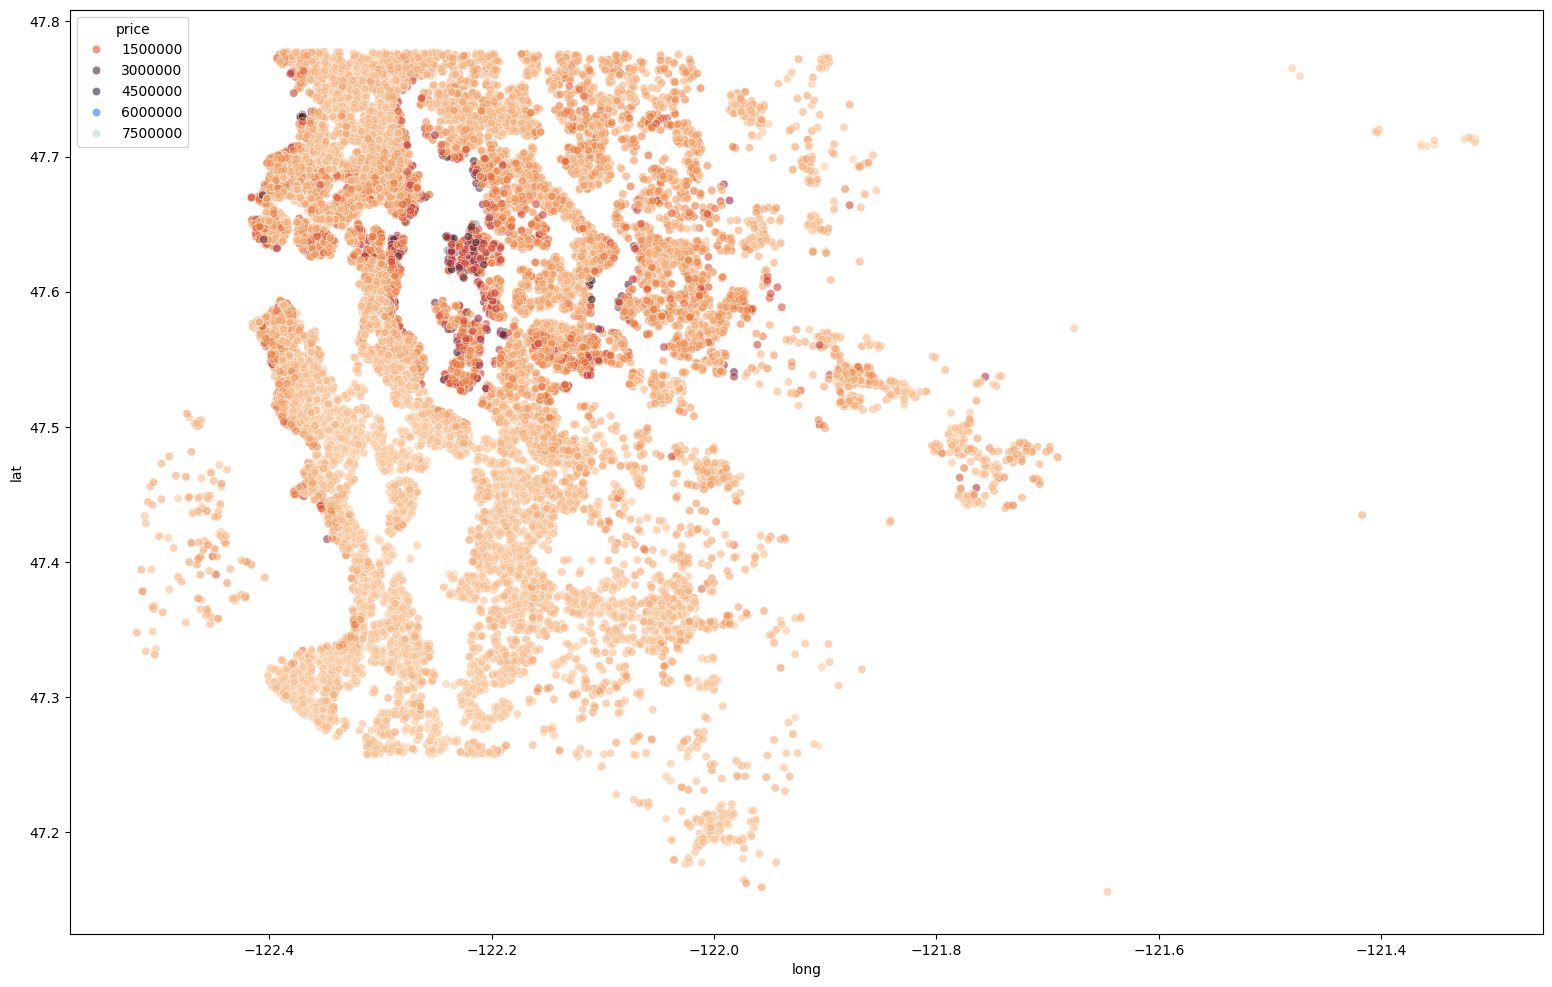

In [81]:
plt.figure(figsize=(19,12))
sns.scatterplot(x='long', y='lat', data=df, hue ='price', alpha=.6, palette='icefire_r')

## An image of King County for comparsion - It appears that waterfront command higher prices
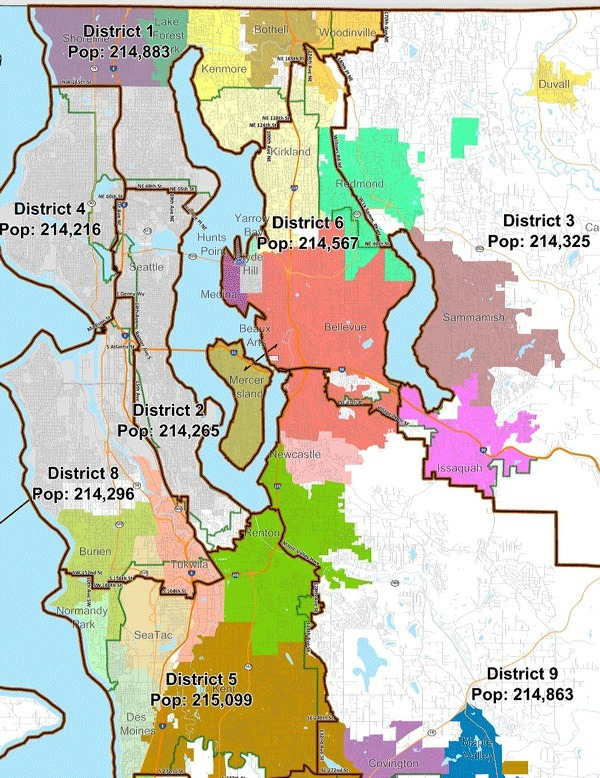

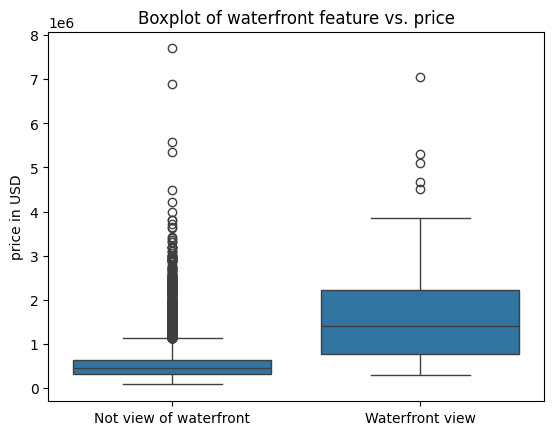

In [96]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df_filtered['waterfront'], y = df_filtered['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [98]:
waterfrontmean = df_filtered[df_filtered['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = df_filtered[df_filtered['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1661876.02
The mean house price for a house without waterfront view is USD 531821.28
